# **Customer Personality Analysis**

# Project Introduction

In this project, I employ K-Means and DBSCAN clustering algorithms to conduct a comprehensive Customer Personality Analysis on the provided dataset. By leveraging these algorithms, we aim to identify distinct customer segments based on their behaviors and preferences, allowing for a more targeted marketing approach.

The K-Means algorithm facilitates the partitioning of customers into predefined clusters, while DBSCAN offers the advantage of discovering clusters of varying shapes and densities without the need for prior knowledge of the number of clusters.

I'll evaluate the performance of these models using metrics such as silhouette score ensuring that our analysis not only enhances understanding of customer segments but also provides actionable insights for product modification and marketing strategies.

DataSet Link: https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fimakash3011%2Fcustomer-personality-analysis%2Fdata

# Literature Survey for Customer Personality Analysis Using Clustering Algorithms

Customer Personality Analysis is essential for businesses aiming to tailor their products and marketing strategies to meet the diverse needs of their customer base. This literature survey examines existing research on customer segmentation, focusing on the application of clustering algorithms like K-Means and DBSCAN. The survey highlights methodologies, findings, challenges, and future directions in the realm of customer analysis.

**1. Customer Segmentation Techniques**

Traditional Methods: Early segmentation strategies relied heavily on demographic data such as age, gender, and income. Smith (1956) proposed a typology of market segmentation based on demographic factors, which laid the foundation for more complex methods.
Behavioral and Psychographic Segmentation: Recent studies emphasize the importance of behavioral (e.g., purchasing patterns) and psychographic (e.g., lifestyle, values) factors in segmentation. For instance, Wedel and Kamakura (2000) highlight that understanding consumer behavior leads to more meaningful segmentation.

**2. Clustering Algorithms**

K-Means Clustering-K-Means is one of the most commonly used clustering algorithms due to its simplicity and efficiency. It partitions data into K distinct clusters by minimizing the variance within each cluster.
DBSCAN (Density-Based Spatial Clustering of Applications with Noise)-identifies clusters based on the density of data points, allowing it to find arbitrarily shaped clusters and handle noise effectively.

**3. Model Evaluation Metrics**

Silhouette Score: This metric measures how similar an object is to its own cluster compared to other clusters. Rousseeuw (1987) introduced the silhouette coefficient as a way to evaluate the quality of clustering.In this sceanrio we use this approach.

**4. Applications in Marketing**

Targeted Marketing: Research by Kumar et al. (2013) demonstrates how businesses can leverage clustering to identify high-value customer segments, allowing for more targeted marketing strategies.
Product Development: Companies have utilized clustering to inform product development, tailoring offerings to meet the specific needs of identified customer segments (Farris et al., 2010).

## DATASET DESCRIPTION



**People**

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Product**

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

**Target**

Need to perform clustering to summarize customer segments

# IMPORTING REQUIRED LIBRARIES

In [2]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.cluster import KMeans
from google.colab import drive
from datetime import date
from datetime import datetime
from scipy.stats import zscore
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Description

In [4]:
# Step 2: Load the dataset


df = pd.read_csv("/content/drive/MyDrive/marketing_campaign_(1).csv", sep='\t')

data_prep = df.copy()


In [5]:
import pandas as pd

# Assuming df is already defined and has 'Year_Birth' and 'Dt_Customer' columns

# Step 1: Calculate Age more accurately
today = pd.to_datetime('today')
# Create a birth date using 1st Jan of Year_Birth
df['Birth_Date'] = pd.to_datetime(df['Year_Birth'].astype(str) + '-01-01')
df['Age'] = (today - df['Birth_Date']).dt.days / 365.25  # Age in years (float)
df['Age'] = df['Age'].astype(int)  # Optional: convert to integer

# Step 2: Convert Dt_Customer to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Step 3: Calculate customer tenure in years
df['Years_customer'] = (today - df['Dt_Customer']).dt.days / 365.25



In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Birth_Date,Age,Years_customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,1957-01-01,68,12.695414
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,1954-01-01,71,11.189596
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,1965-01-01,60,11.734428
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,1984-01-01,41,11.260780
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,1981-01-01,44,11.321013


In [7]:
# Calculate total expenses and accepted campaign
df['Total_Expenses'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                        df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])
df['Total_Acc_Cmp'] = (df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] +
                       df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response'])

# Overview of the Dataset:

In [8]:
# Step 5: Explore the dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Birth_Date,Age,Years_customer,Total_Expenses,Total_Acc_Cmp
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,0.013393,0.009375,3.0,11.0,0.149107,1968-10-21 16:33:51.428571432,56.194196,11.848274,605.798214,0.446875
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.0,11.0,0.000000,1893-01-01 00:00:00,29.000000,10.880219,5.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,0.000000,3.0,11.0,0.000000,1959-01-01 00:00:00,48.000000,11.375086,68.750000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,0.000000,0.000000,3.0,11.0,0.000000,1970-01-01 00:00:00,55.000000,11.853525,396.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,0.000000,0.000000,3.0,11.0,0.000000,1977-01-01 00:00:00,66.000000,12.328542,1045.500000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,3.0,11.0,1.000000,1996-01-01 00:00:00,132.000000,12.793977,2525.000000,5.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,0.114976,0.096391,0.0,0.0,0.356274,NaN,11.984069,0.553381,602.249288,0.890543


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(2240, 34)

In [12]:
print(f"Unique IDs: {df['ID'].nunique()}")

Unique IDs: 2240


In [13]:
print("Number of unique values in Z_CostContact column:", df['Z_CostContact'].nunique())
print("Number of unique values in Z_Revenue column:", df["Z_Revenue"].nunique())

Number of unique values in Z_CostContact column: 1
Number of unique values in Z_Revenue column: 1




*   Observations: 2,240 across 29 columns.
*   Missing Values: 24 in the 'income' column.


*   Column Types: Mostly numerical; three categorical: 'marital_status', 'education', 'Dt_customer' (to be converted to date).









Duplicates: None detected.

In [15]:
# Remove unnecessary columns ('Id' and columns with 1 unique value)
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [14]:
#string format to a datetime format.
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format="%d-%m-%Y")
latest_date = df['Dt_Customer'].max()
df['Days_is_client'] = (latest_date - df['Dt_Customer']).dt.days

In [16]:
# Count values in categorical columns
categorical_columns = df.select_dtypes('object')

for column in categorical_columns:
    value_counts = df[column].value_counts()
    print(value_counts)
    print("\n")

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64




In [17]:
# Standardize 'Marital_Status' into 2 broader groups
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Partner')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

# Standardize 'Education' into 3 broader groups
df['Education'] = df['Education'].replace(['PhD', 'Master'], 'Postgraduate')
df['Education'] = df['Education'].replace(['2n Cycle', 'Graduation'], 'Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Undergraduate')

for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("\n")

Unique values in Education:
['Graduate' 'Postgraduate' 'Undergraduate']


Unique values in Marital_Status:
['Single' 'Partner']




In [18]:
# Combining columns together to reduce the number of dimensions

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [19]:
data = df.copy()
df = df[['Education', 'Marital_Status', 'Income', 'Kids', 'Days_is_client', 'Recency', 'Expenses',
                 'TotalNumPurchases', 'TotalAcceptedCmp', 'Complain', 'Response']]

In [20]:
# Step 6: Handle duplicate values
df.drop_duplicates(inplace=True)

# Remove rows with any missing values (NaN)
df.dropna(inplace=True)

df.shape

(2031, 11)

In [21]:
# Categorize columns into three groups based on their data type

binary_columns = [col for col in df.columns if df[col].nunique() == 2]
categorical_columns = [col for col in df.columns if 2 < df[col].nunique() < 10]
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns
                     if col not in binary_columns + categorical_columns]

In [22]:
## Detecting Outliers
import pandas as pd
from scipy import stats
# Calculate the z-scores for each column
z_scores = pd.DataFrame(stats.zscore(df[numerical_columns]), columns=numerical_columns)

# Generate descriptive statistics for the z-scores
print("Descriptive Statistics for Z-Scores before Outliers Removal")
display(z_scores.describe().round(3))

Descriptive Statistics for Z-Scores before Outliers Removal


,Income,Days_is_client,Recency,Expenses,TotalNumPurchases
count,2031.000,2031.000,2031.000,2031.000,2031.000
mean,0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000
min,-1.984,-1.743,-1.688,-0.999,-1.945
25%,-0.660,-0.863,-0.859,-0.893,-0.900
50%,-0.032,-0.003,0.004,-0.350,0.014
75%,0.634,0.867,0.867,0.729,0.797
max,24.058,1.713,1.730,3.176,3.801


In [23]:
import numpy as np
from scipy import stats

# Step 1: Select only numeric columns for z-score calculation
numeric_cols = df.select_dtypes(include=[np.number])

# Step 2: Compute z-scores
z_scores = np.abs(stats.zscore(numeric_cols))

# Step 3: Convert to DataFrame with the same index as df
z_scores_df = pd.DataFrame(z_scores, columns=numeric_cols.columns, index=df.index)

# Step 4: Identify outliers (rows where any z-score > 3)
outliers = z_scores_df[(z_scores_df > 3).any(axis=1)]

# Step 5: Drop the rows from the original df
df = df.drop(outliers.index)


# EDA

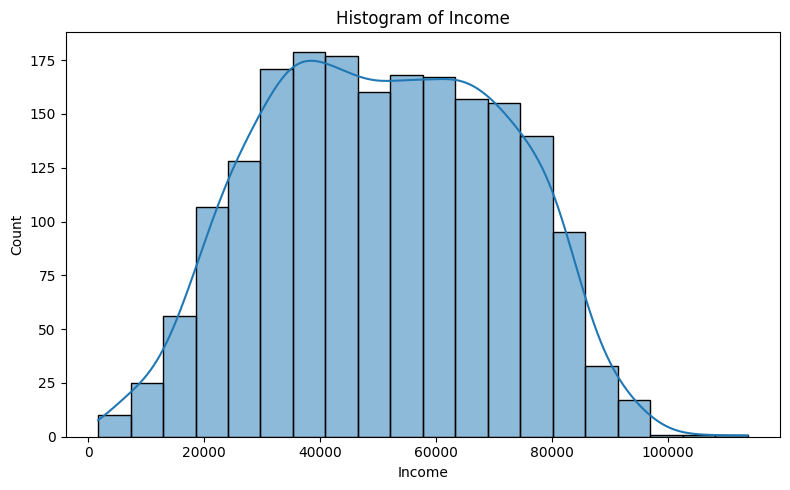

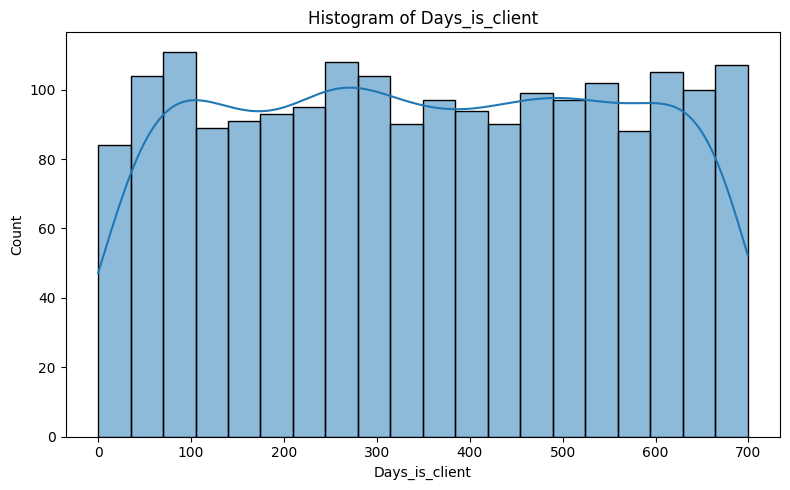

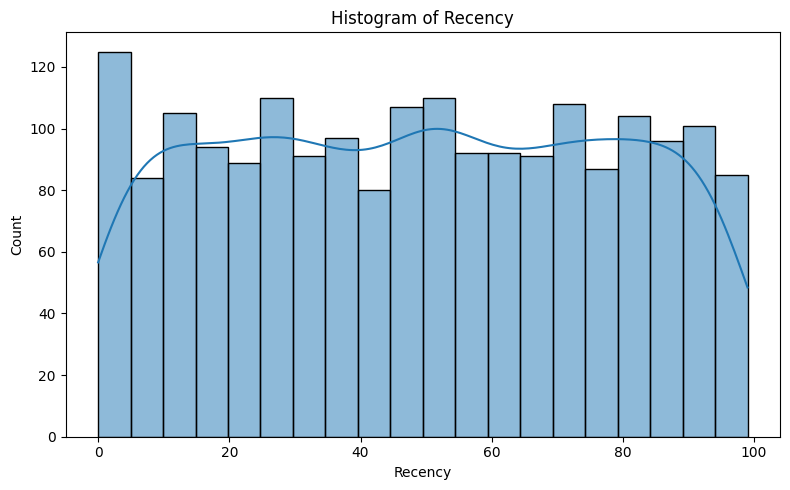

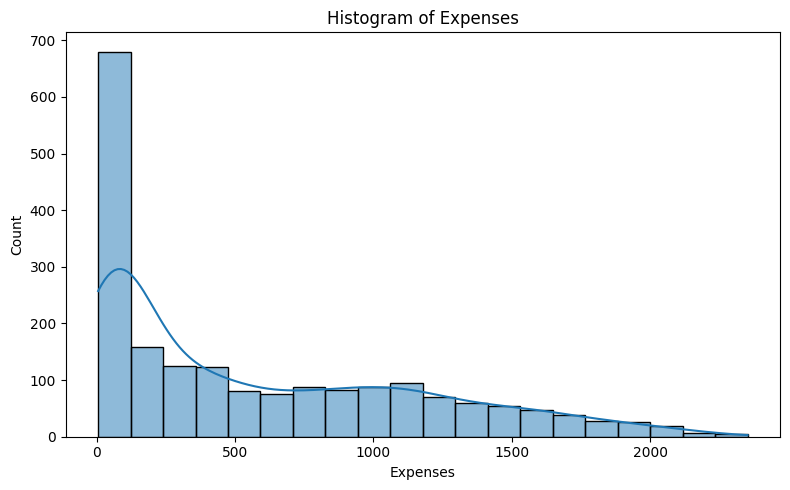

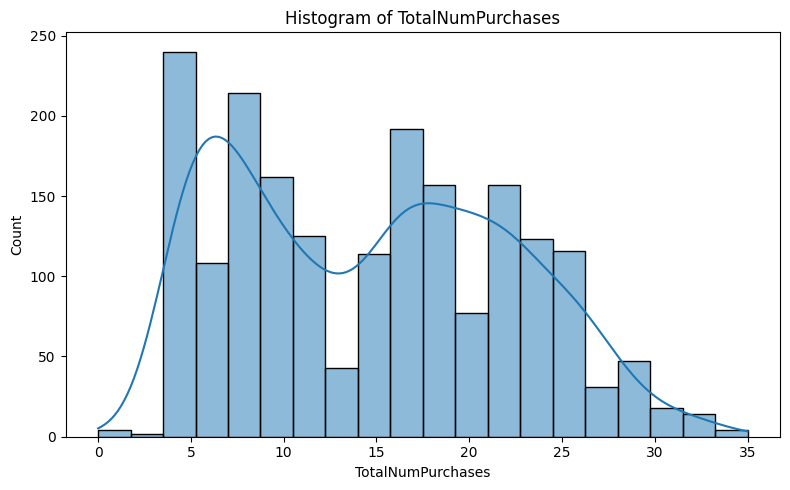

In [24]:
# Plot histograms for each numerical column
for column in numerical_columns:

    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()

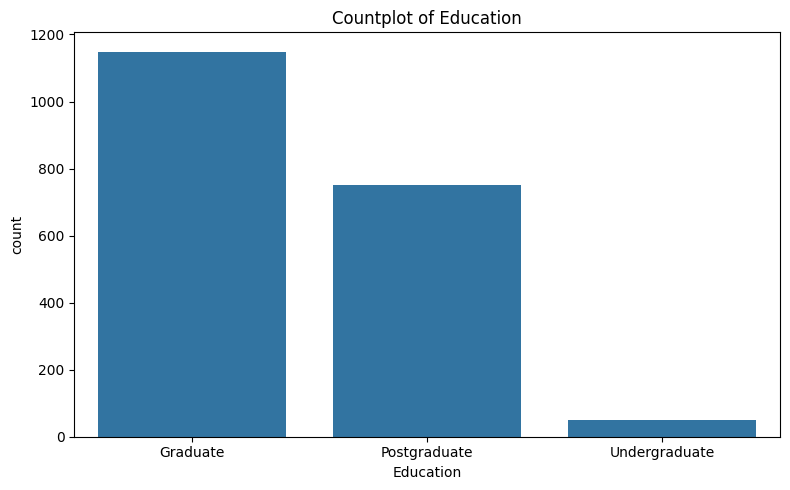

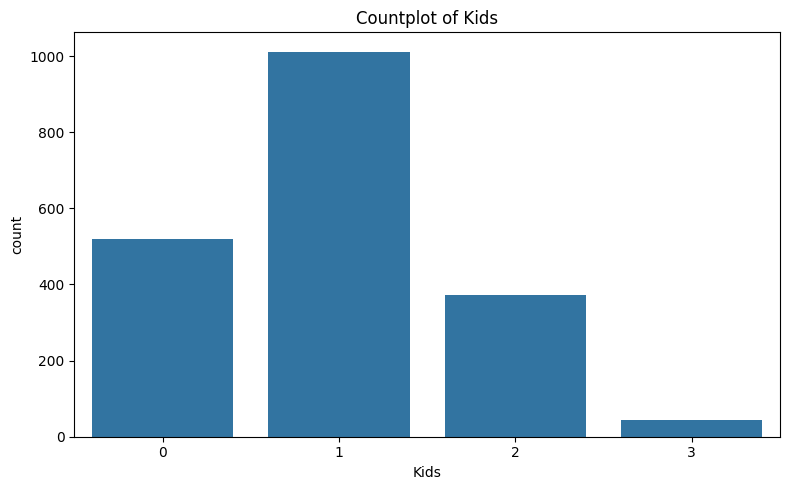

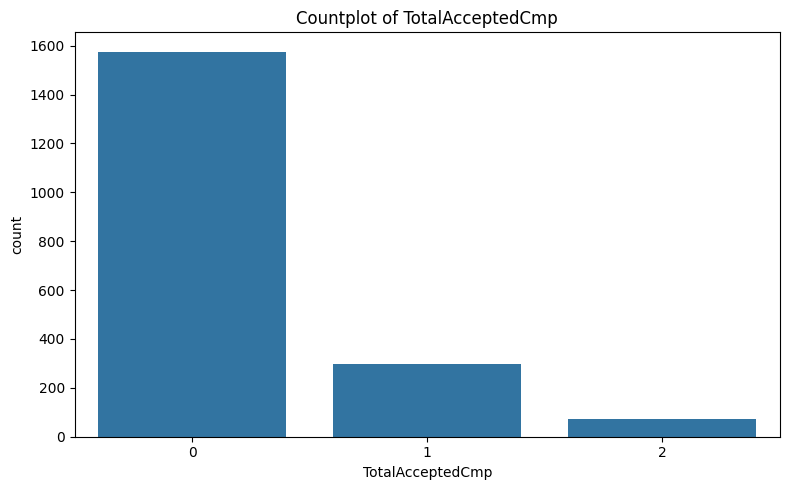

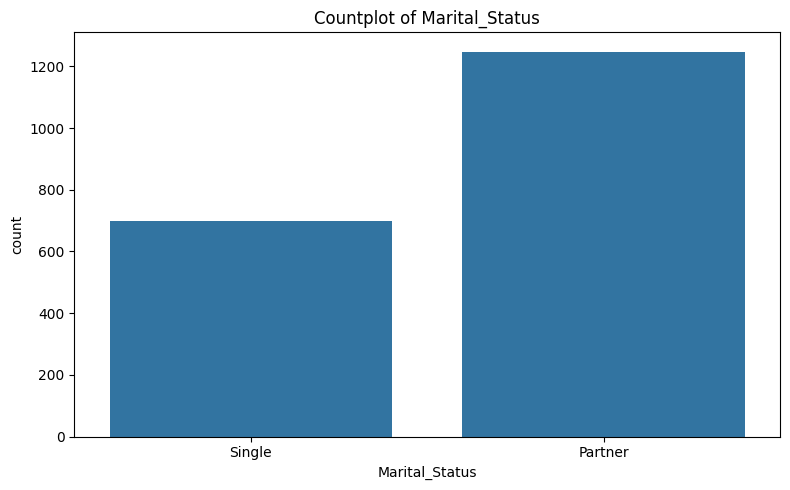

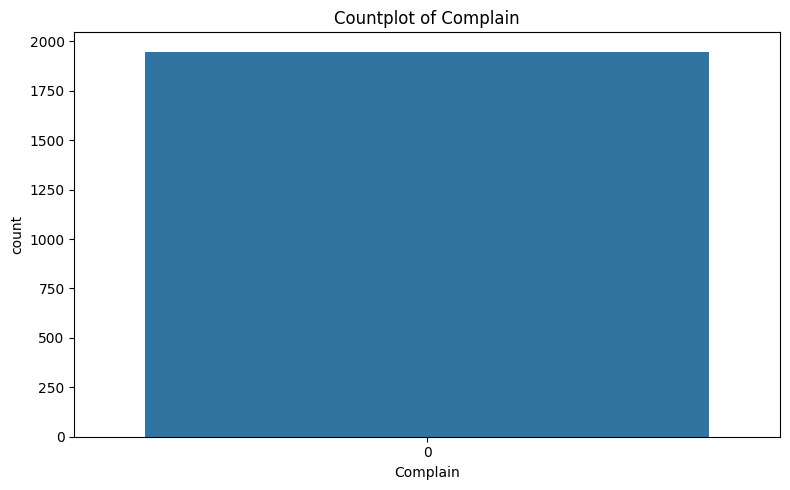

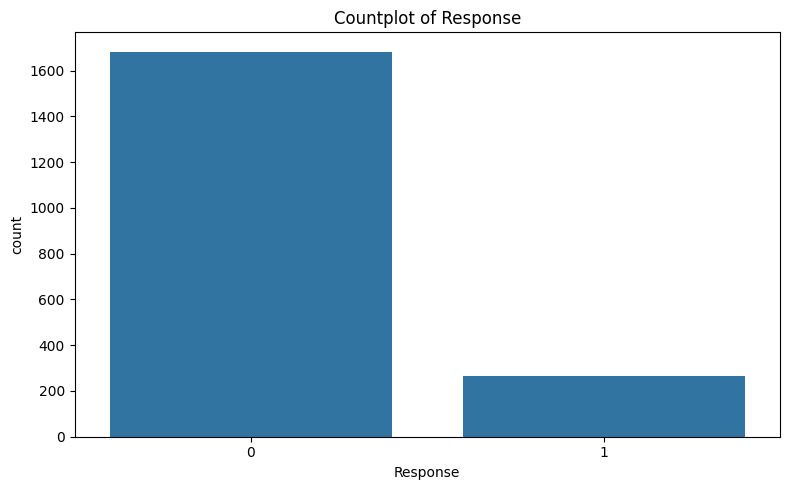

In [25]:
# Plot countplots for each categorical column
for column in categorical_columns + binary_columns:

    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')

    plt.tight_layout()
    plt.show()

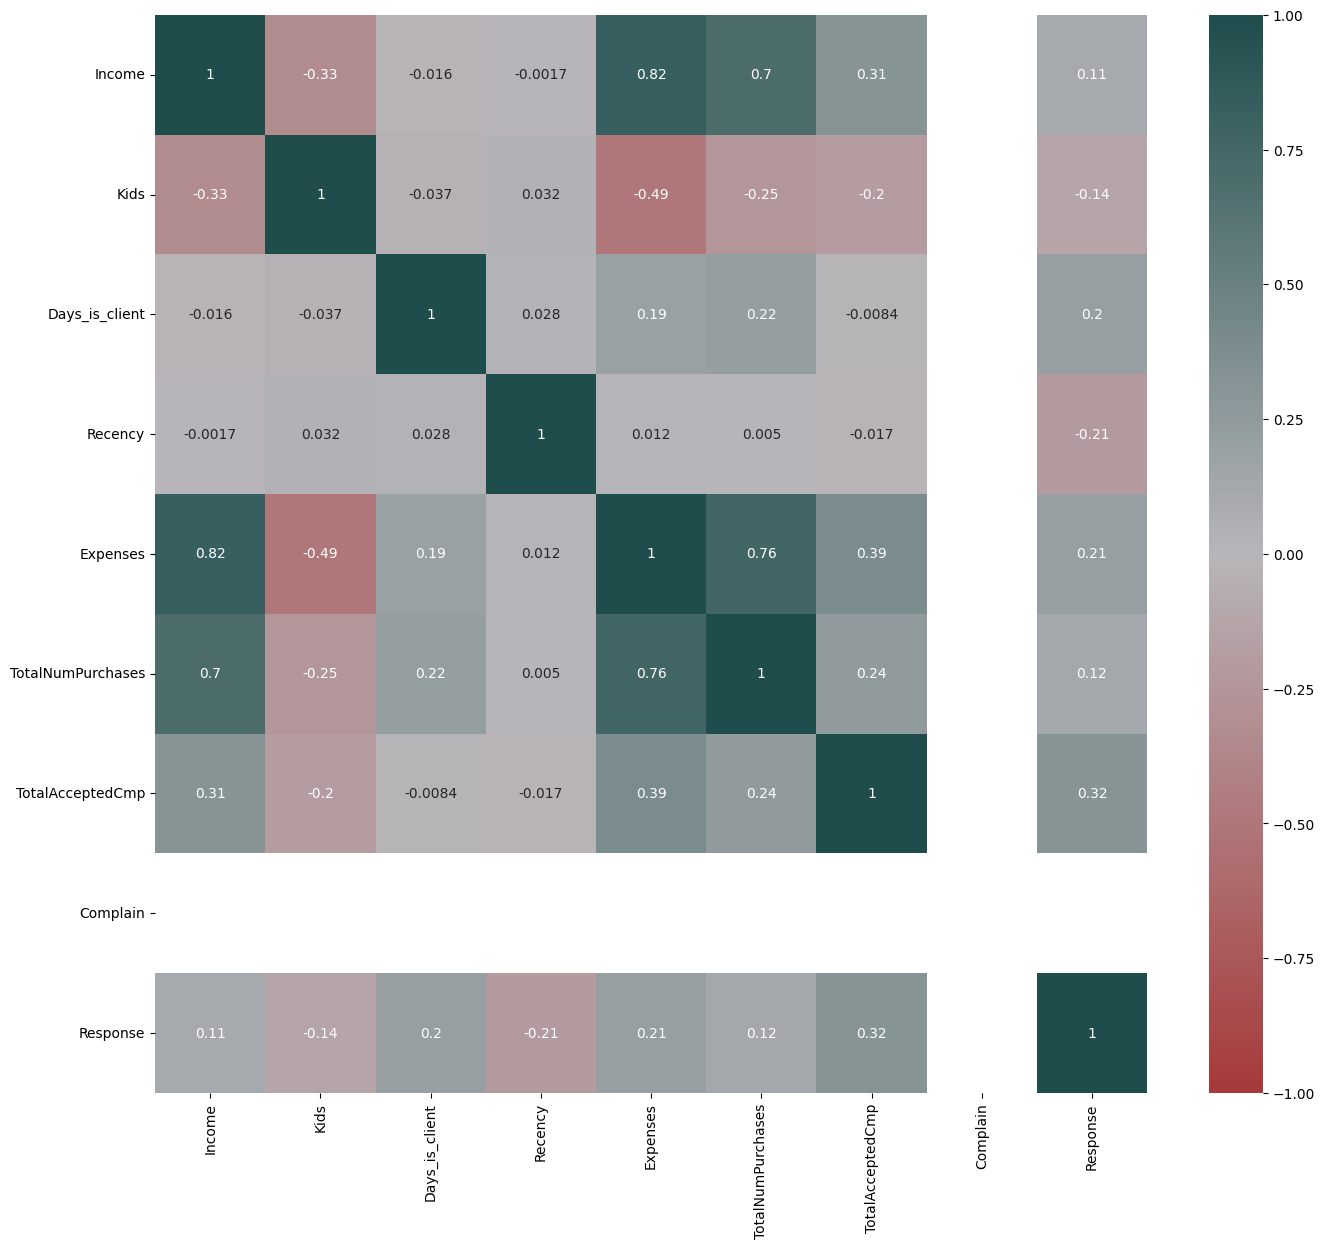

In [26]:
from matplotlib.colors import LinearSegmentedColormap

colors = ["#A6393A", "#B7B5B9", "#1E4D4C"]

cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Example correlation matrix
corr_df= df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(16,14))
sns.heatmap(corr_df, cmap=cmap, center=0, vmin=-1, annot=True)
plt.show()

# DATA PREPROCESSING

In [27]:
# Step 3: Clean and rename columns
df.columns = df.columns.str.strip()

In [28]:
print(df.isna().sum()) #

Education            0
Marital_Status       0
Income               0
Kids                 0
Days_is_client       0
Recency              0
Expenses             0
TotalNumPurchases    0
TotalAcceptedCmp     0
Complain             0
Response             0
dtype: int64


In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
# Apply one-hot encoding directly with pandas
categorical_columns = df.select_dtypes(include=['object']).columns


X_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)

In [31]:
# Instantiate Scaler
scaler = StandardScaler()

# fit_transform
X_scaled = scaler.fit_transform(X_encoded)
X_scaled.shape

(1948, 12)

# Model Implementation

**K-means Clusturing**

In [32]:
# Initialize the KMeans algorithm with 2 clusters and a maximum of 50 iterations
kmeans = KMeans(n_clusters=2, max_iter=50)

# Fit the KMeans algorithm
kmeans.fit(X_scaled)
y_kmeans = kmeans.fit_predict(X_scaled)

# Transform the scaled data back to its original scale using the inverse transformation
X_transformed = scaler.inverse_transform(X_scaled)

In [33]:
pd.DataFrame(X_transformed, columns=X_encoded.columns).head()

,Income,Kids,Days_is_client,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single
0,58138.0,0.0,663.0,58.0,1617.0,25.0,0.0,0.0,1.0,0.0,0.0,1.0
1,46344.0,2.0,113.0,38.0,27.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0
2,71613.0,0.0,312.0,26.0,776.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26646.0,1.0,139.0,26.0,53.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58293.0,1.0,161.0,94.0,422.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0


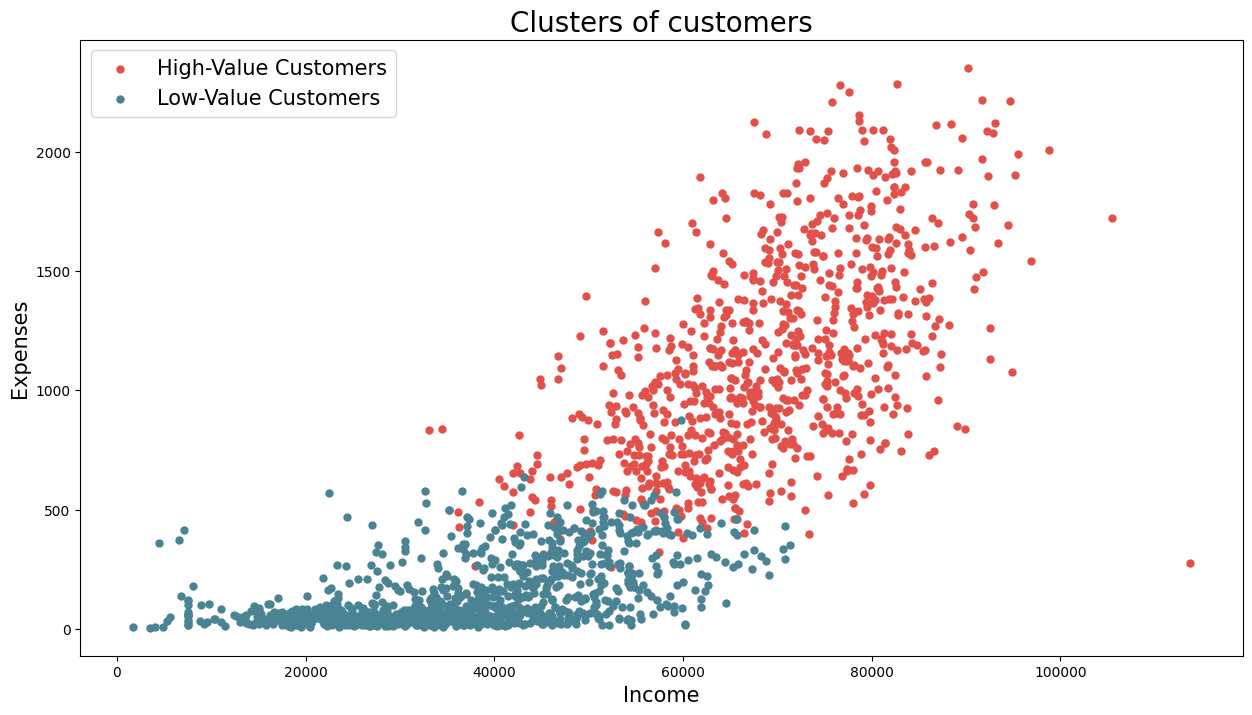

In [34]:
# Set the figure size for the plot
plt.figure(figsize=(15, 8))

# Plot the customers in Cluster 0 (High-Value Customers), using red color
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 4], s=25, c='#E2504A', label='High-Value Customers')

# Plot the customers in Cluster 1 (Low-Value Customers), using blue color
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 4], s=25, c='#498394', label='Low-Value Customers')

# Add title to the plot
plt.title('Clusters of customers', fontsize=20)

# Add label for the x-axis (Income)
plt.xlabel('Income', fontsize=15)

# Add label for the y-axis (Expenses)
plt.ylabel('Expenses', fontsize=15)

# Show the legend to identify each cluster
plt.legend(fontsize=15)

# Display the plot
plt.show()

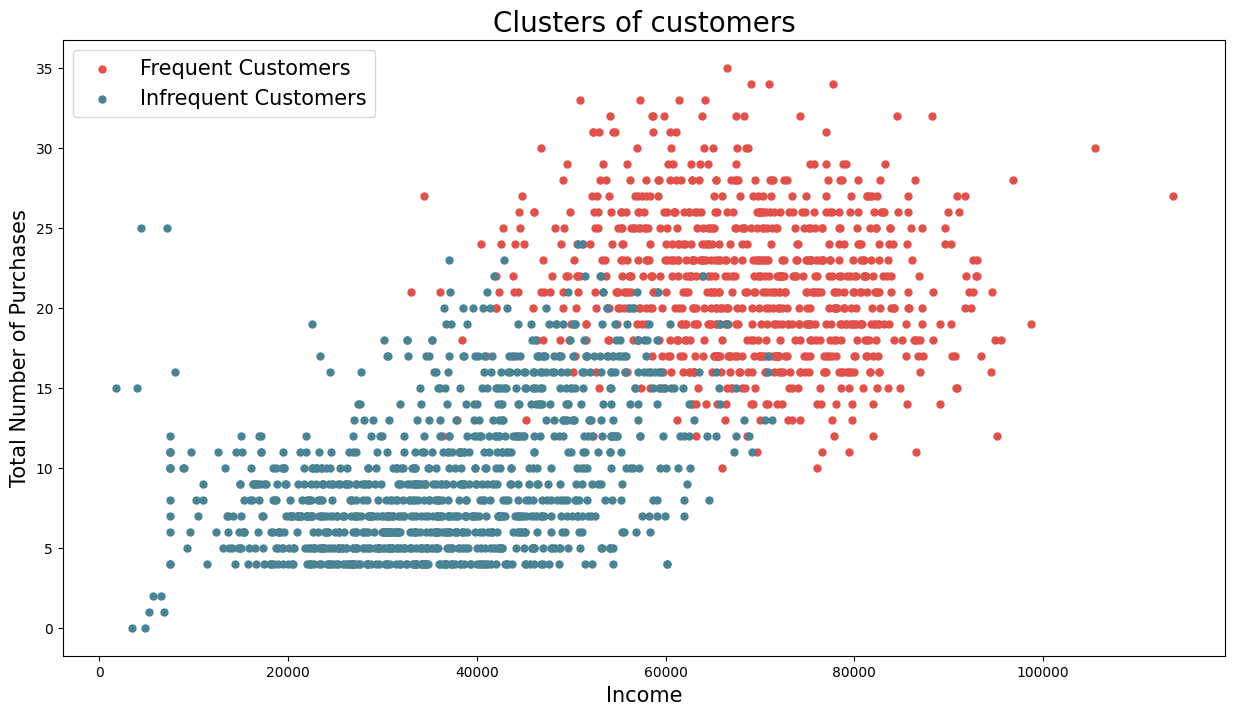

In [35]:
# Set the figure size for the plot
plt.figure(figsize=(15, 8))

# Plot the customers in Cluster 0 (Frequent Customers), using red color
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 5], s=25, c='#E2504A', label='Frequent Customers')

# Plot the customers in Cluster 1 (Infrequent Customers), using blue color
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 5], s=25, c='#498394', label='Infrequent Customers')

# Add title to the plot
plt.title('Clusters of customers', fontsize=20)

# Add label for the x-axis (Income)
plt.xlabel('Income', fontsize=15)

# Add label for the y-axis (Total Number of Purchases)
plt.ylabel('Total Number of Purchases', fontsize=15)

# Show the legend to identify each cluster
plt.legend(fontsize=15)

# Display the

Clusters: 2, SSD: 16864.34473154984
Clusters: 3, SSD: 15271.712495748354
Clusters: 4, SSD: 14299.448911401352
Clusters: 5, SSD: 12319.260081044262
Clusters: 6, SSD: 11584.24959340387
Clusters: 7, SSD: 10979.817802305633
Clusters: 8, SSD: 10623.485811719496
Clusters: 9, SSD: 9953.406251272005
Clusters: 10, SSD: 9796.960213990236
The elbow point (optimal number of clusters) is: 5


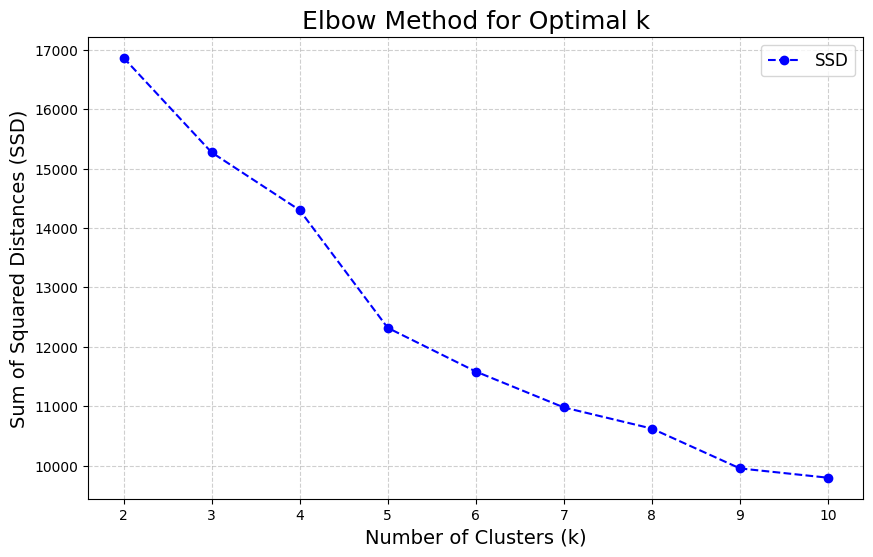

In [36]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow-curve/SSD
ssd = []  # List to store the Sum of Squared Distances (SSD) for each k
range_n_clusters = range(2, 11)  # Range of k values from 2 to 10 for better insights

# Loop over the range of number of clusters (k)
for num_clusters in range_n_clusters:
    # Initialize the KMeans algorithm with current number of clusters and 300 maximum iterations
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300, random_state=101)

    # Fit the KMeans model to the scaled data (X_scaled)
    kmeans.fit(X_scaled)

    # Append the inertia (SSD) for the current number of clusters to the list
    ssd.append(kmeans.inertia_)

    # Print the k value and its corresponding SSD
    print(f"Clusters: {num_clusters}, SSD: {kmeans.inertia_}")

# Find the "elbow" point (where SSD starts to decrease less dramatically)
# Compute the rate of change in SSD between consecutive points
ssd_diff = [ssd[i] - ssd[i-1] for i in range(1, len(ssd))]  # Difference between SSDs
ssd_diff_diff = [ssd_diff[i] - ssd_diff[i-1] for i in range(1, len(ssd_diff))]  # 2nd derivative (change in the rate)

# The elbow is where the second derivative is the smallest (change in slope)
elbow_point = range_n_clusters[2 + ssd_diff_diff.index(min(ssd_diff_diff))]  # Add 2 because of indexing

print(f"The elbow point (optimal number of clusters) is: {elbow_point}")

# Plot the SSD values for each number of clusters (k)
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.plot(range_n_clusters, ssd, marker='o', linestyle='--', color='b', label="SSD")  # Plot SSD vs k with markers

# Add labels and title to the plot
plt.title('Elbow Method for Optimal k', fontsize=18)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Sum of Squared Distances (SSD)', fontsize=14)
plt.xticks(range_n_clusters)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Show the plot
plt.show()

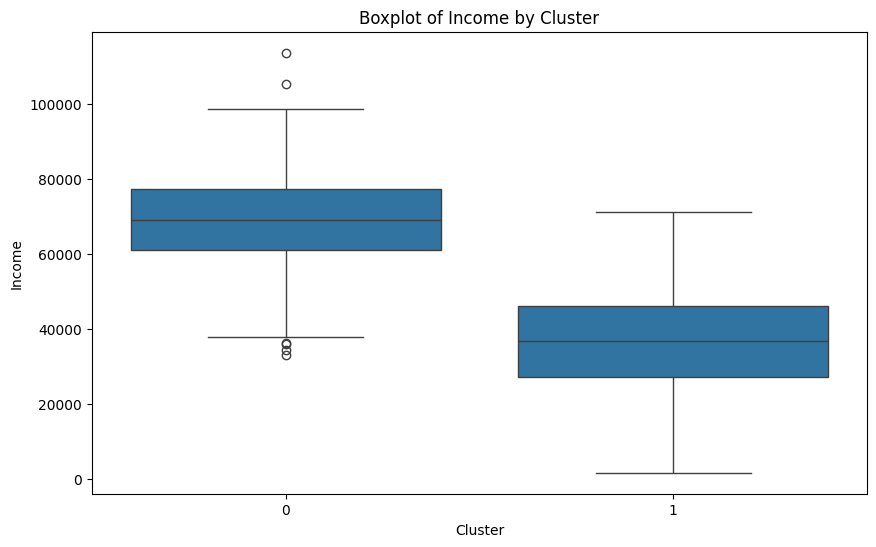

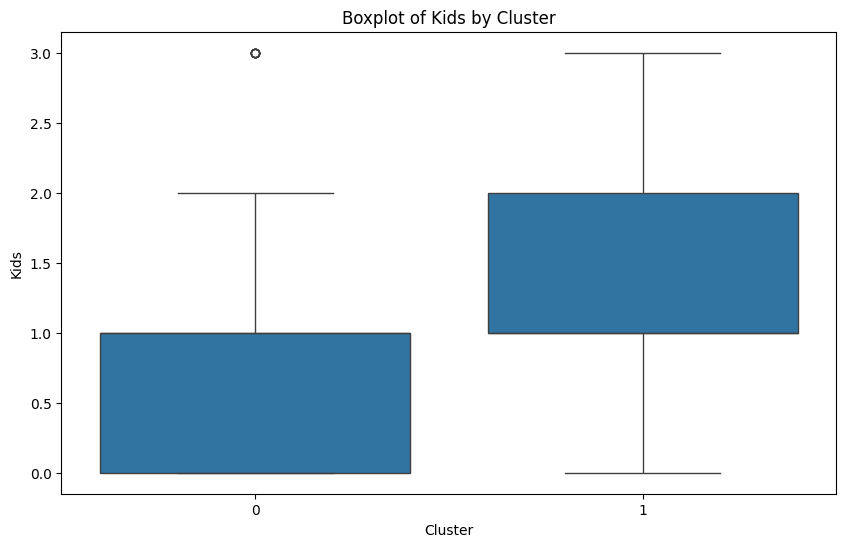

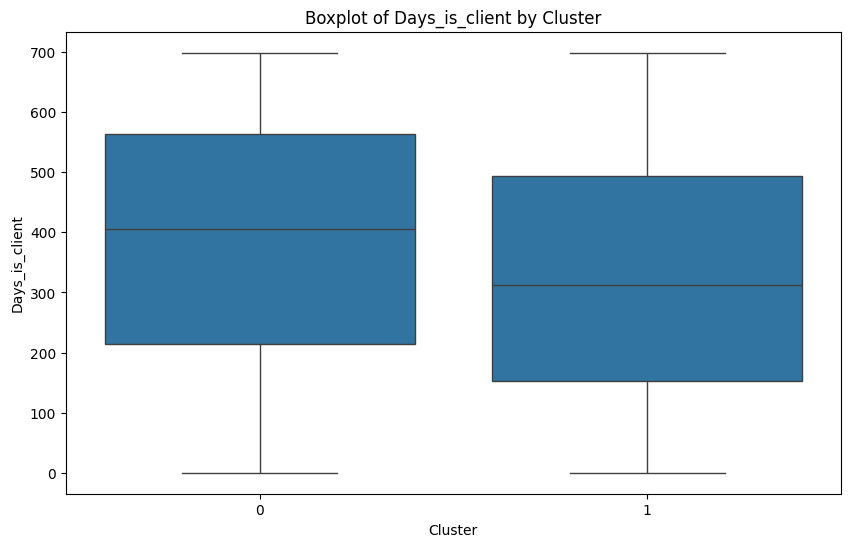

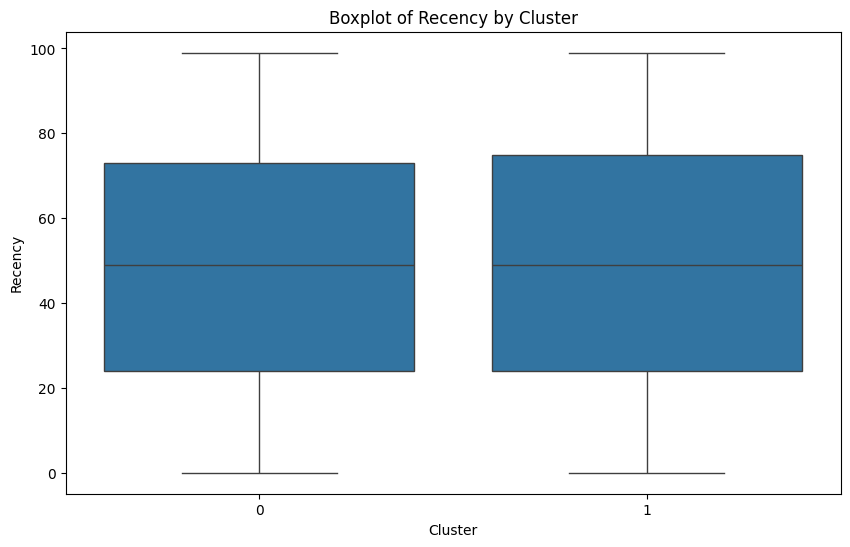

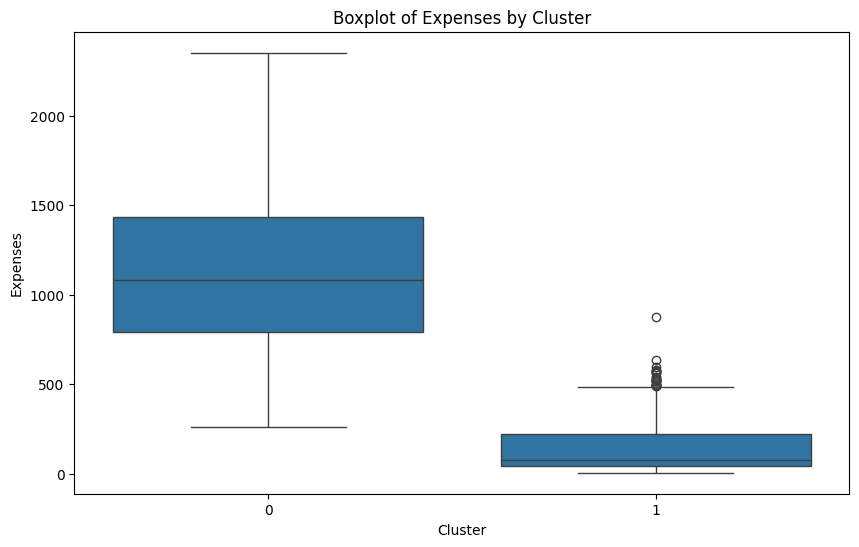

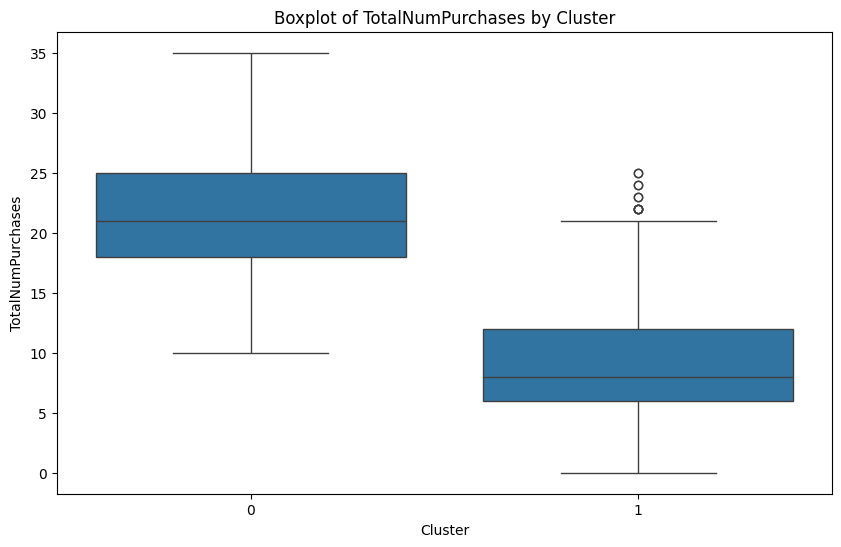

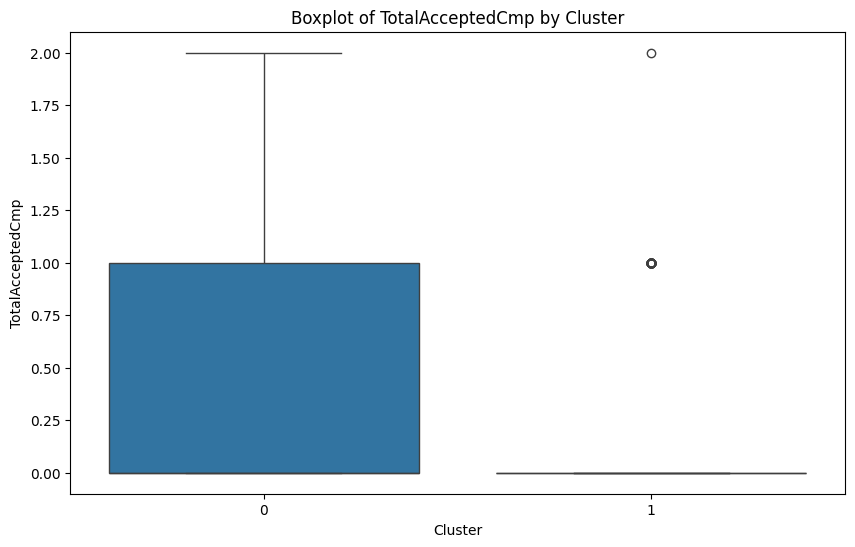

In [37]:
# Create a copy of the original DataFrame and add a new column 'Cluster'
df_clusters = df.copy()
df_clusters['Cluster'] = y_kmeans

# Select numerical columns to plot
columns_to_plot = ['Income', 'Kids', 'Days_is_client', 'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp']

# Plot boxplots for each numerical column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=df_clusters)  # Adjust palette as needed
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

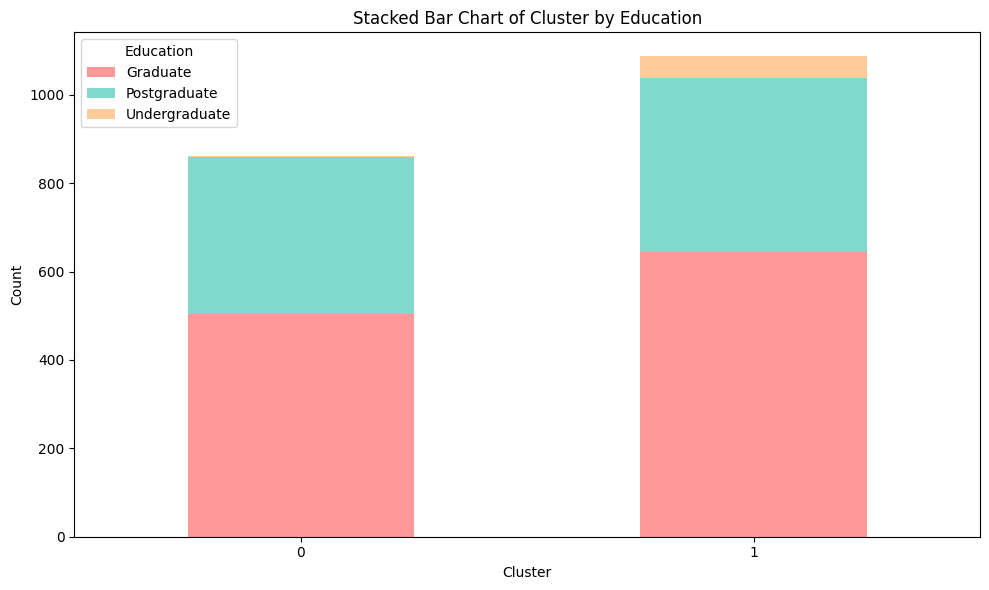

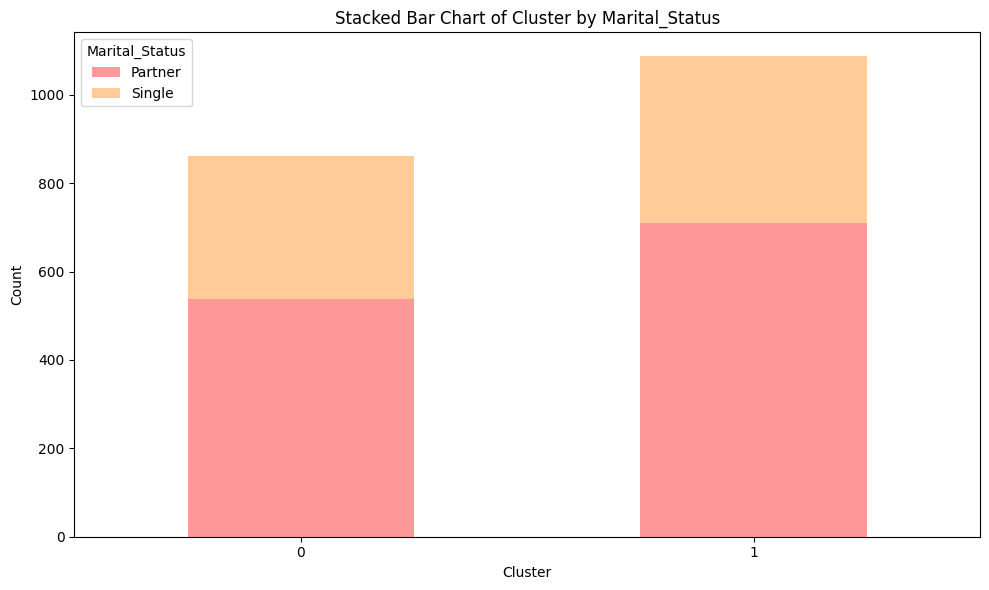

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define a custom color palette
custom_palette = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_palette)

# Assuming df_clusters is your DataFrame
# List of categorical columns to plot
categorical_columns = ['Education', 'Marital_Status']

for column in categorical_columns:
    # Prepare data
    data = df_clusters.groupby(['Cluster', column]).size().unstack().fillna(0)

    # Plot stacked bar chart
    data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap)

    plt.title(f'Stacked Bar Chart of Cluster by {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# DBSCAN CLUSTURING

In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler # For normalizing data
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA  # For reducing dimensions
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [40]:
# Step 1: Data Preprocessing
categorical_columns = df.select_dtypes(include=['object']).columns

In [41]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)    ##for non-ordinal categories

In [42]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)  # omputes the mean and standard deviation for each feature

In [43]:
# Before running the function

#prints the shape and summary statistics of the scaled datase
print("Data shape:", X_scaled.shape)
print("Data summary:")
print(pd.DataFrame(X_scaled).describe())

Data shape: (1948, 12)
Data summary:
                 0             1             2             3             4   \
count  1.948000e+03  1.948000e+03  1.948000e+03  1.948000e+03  1.948000e+03   
mean   3.556361e-17 -2.553285e-17 -9.301252e-17  9.392441e-17  3.100417e-17   
std    1.000257e+00  1.000257e+00  1.000257e+00  1.000257e+00  1.000257e+00   
min   -2.432185e+00 -1.311394e+00 -1.736488e+00 -1.685360e+00 -9.945933e-01   
25%   -7.909683e-01 -1.311394e+00 -8.587490e-01 -8.576661e-01 -8.856164e-01   
50%   -9.777298e-03  4.024383e-02 -5.665219e-03  4.514498e-03 -3.649489e-01   
75%    7.971440e-01  4.024383e-02  8.683758e-01  8.666951e-01  7.339017e-01   
max    3.104606e+00  2.743519e+00  1.710365e+00  1.728876e+00  3.065229e+00   

                 5             6       7             8             9   \
count  1.948000e+03  1.948000e+03  1948.0  1.948000e+03  1.948000e+03   
mean   8.845309e-17 -4.377060e-17     0.0  3.282795e-17 -8.024610e-17   
std    1.000257e+00  1.000257e+0

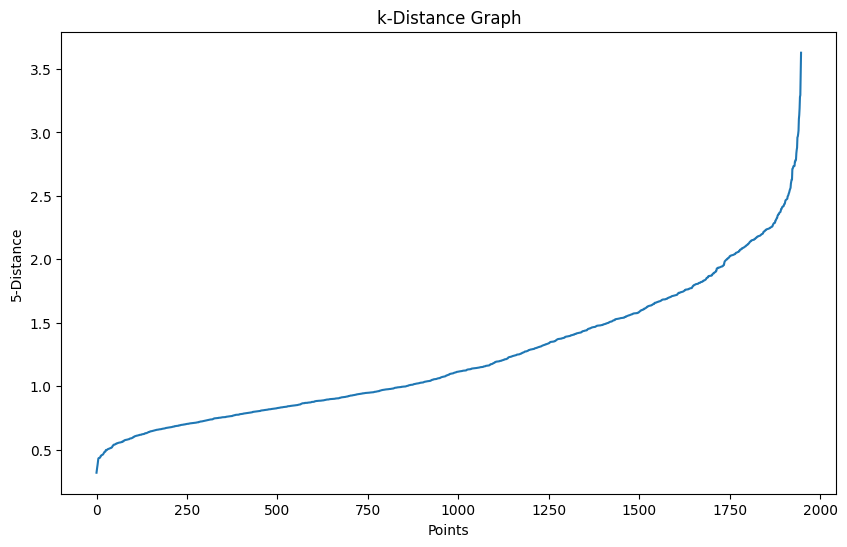

In [44]:
from sklearn.neighbors import NearestNeighbors  ## identifying the optimal value for eps
import matplotlib.pyplot as plt
import numpy as np

def k_distance_plot(X, k=5):
    nearest_neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = nearest_neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    sorted_distances = np.sort(distances[:, -1])
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-Distance')
    plt.title('k-Distance Graph')
    plt.show()

k_distance_plot(X_scaled, k=5)


In [45]:
# Step 2: Implement DBSCAN Algorithm
from sklearn.cluster import DBSCAN

# Adjust eps and min_samples as per dataset for optimal results
dbscan = DBSCAN(eps=3, min_samples=11, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X_scaled)

# Verify that the lengths match
print("Length of original DataFrame:", len(df))
print("Length of DBSCAN labels:", len(dbscan_labels))

# Add cluster labels to the DataFrame
if len(df) == len(dbscan_labels):
    df_clusters = df.copy()
    df_clusters['Cluster'] = dbscan_labels
else:
    # Adjust df to match X_scaled
    df_clusters = df.iloc[:len(dbscan_labels)].copy()
    df_clusters['Cluster'] = dbscan_labels

print(df_clusters.head())

Length of original DataFrame: 1948
Length of DBSCAN labels: 1948
      Education Marital_Status   Income  Kids  Days_is_client  Recency  \
0      Graduate         Single  58138.0     0             663       58   
1      Graduate         Single  46344.0     2             113       38   
2      Graduate        Partner  71613.0     0             312       26   
3      Graduate        Partner  26646.0     1             139       26   
4  Postgraduate        Partner  58293.0     1             161       94   

   Expenses  TotalNumPurchases  TotalAcceptedCmp  Complain  Response  Cluster  
0      1617                 25                 0         0         1        0  
1        27                  6                 0         0         0        0  
2       776                 21                 0         0         0        0  
3        53                  8                 0         0         0        0  
4       422                 19                 0         0         0        0  


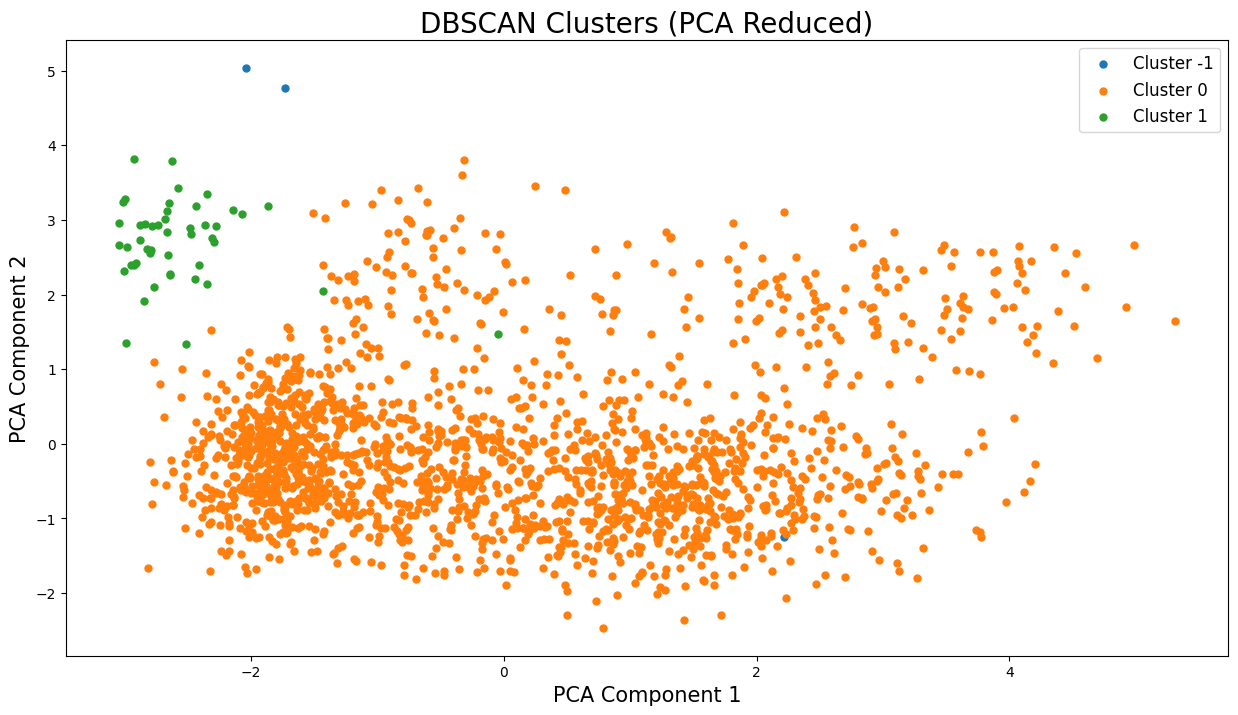

In [46]:
# Step 3: Visualize Clusters Using PCA
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(15, 8))
unique_labels = np.unique(dbscan_labels)

# Plot each cluster
for label in unique_labels:
    mask = dbscan_labels == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Cluster {label}', s=25)

plt.title('DBSCAN Clusters (PCA Reduced)', fontsize=20)
plt.xlabel('PCA Component 1', fontsize=15)
plt.ylabel('PCA Component 2', fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [47]:
print(df_clusters.columns)

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Days_is_client',
       'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp',
       'Complain', 'Response', 'Cluster'],
      dtype='object')


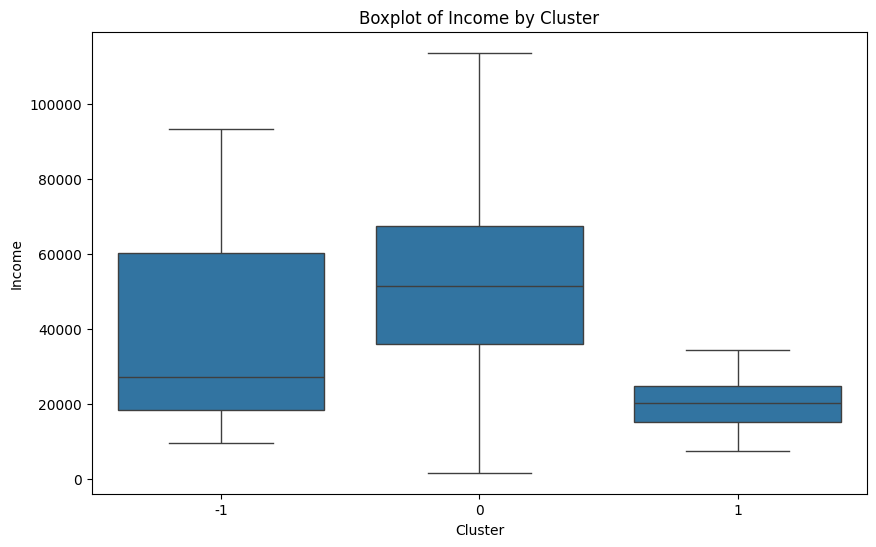

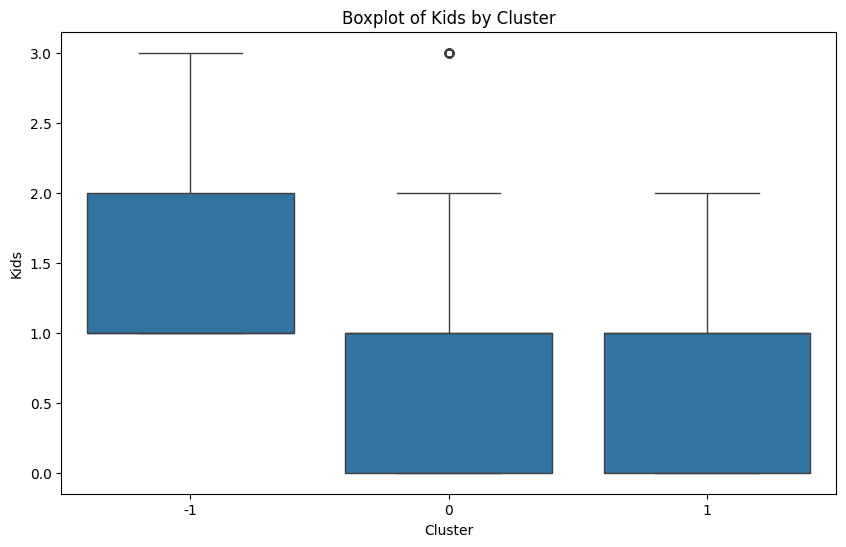

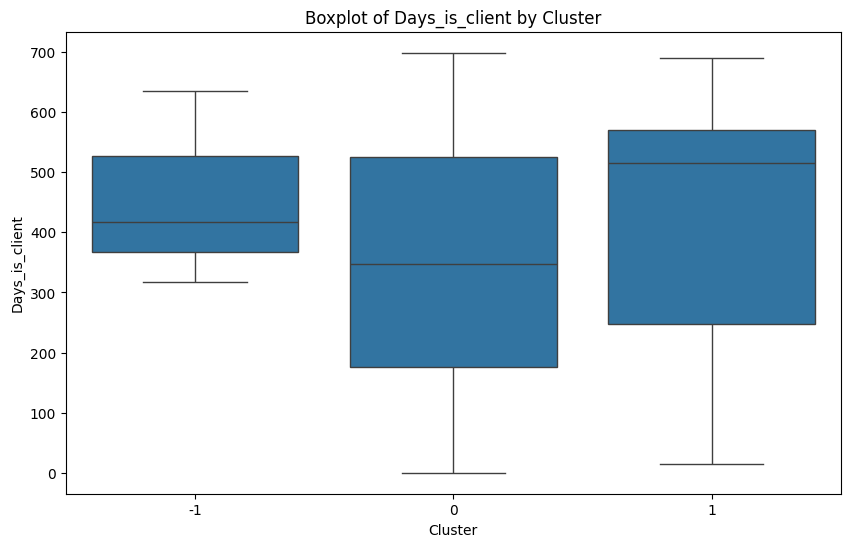

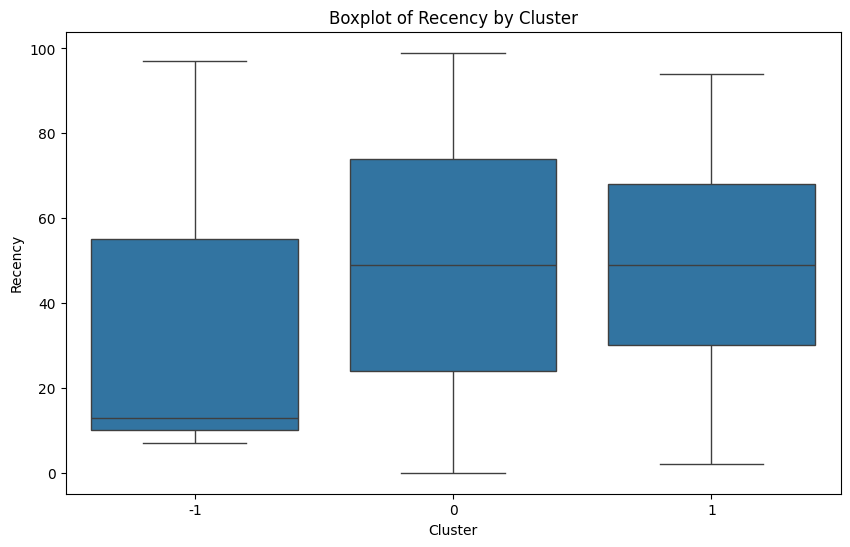

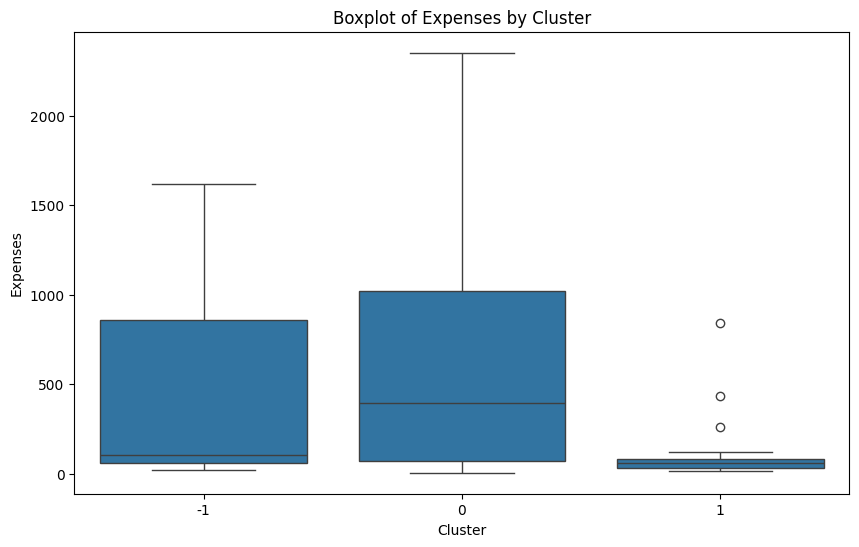

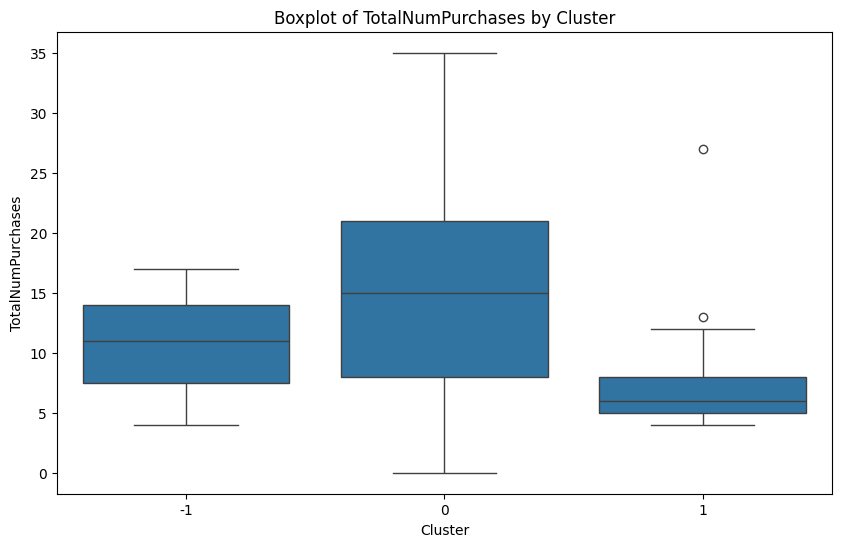

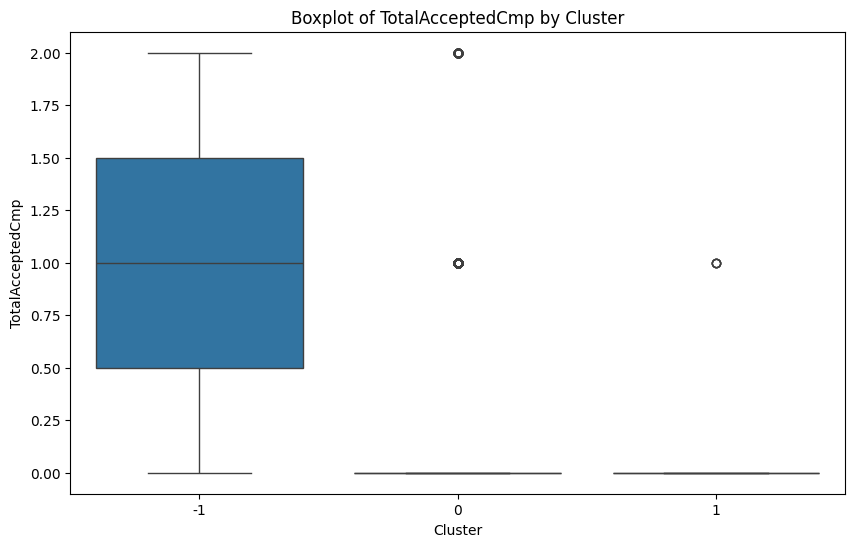

In [48]:
# Ensure 'Kids' column exists
if 'Kids' not in df_clusters.columns:
    df_clusters['Kids'] = df_clusters['Kidhome'] + df_clusters['Teenhome']

# Numerical columns for analysis
numerical_columns = ['Income', 'Kids', 'Days_is_client', 'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp']

# Boxplot analysis
for column in numerical_columns:
    if column in df_clusters.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Cluster', y=column, data=df_clusters)
        plt.title(f'Boxplot of {column} by Cluster')
        plt.xlabel('Cluster')
        plt.ylabel(column)
        plt.show()
    else:
        print(f"Column '{column}' is not in the DataFrame.")

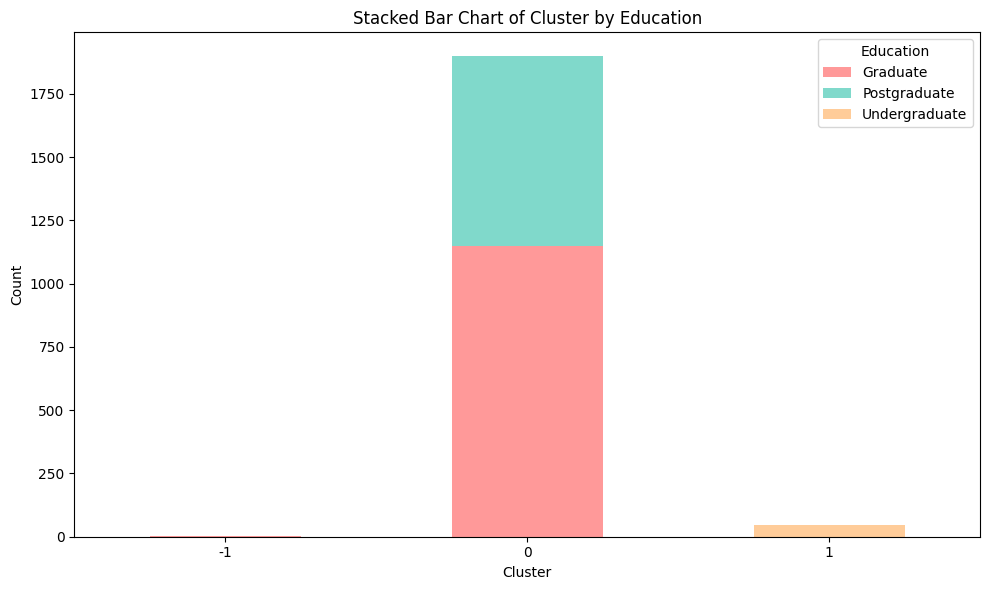

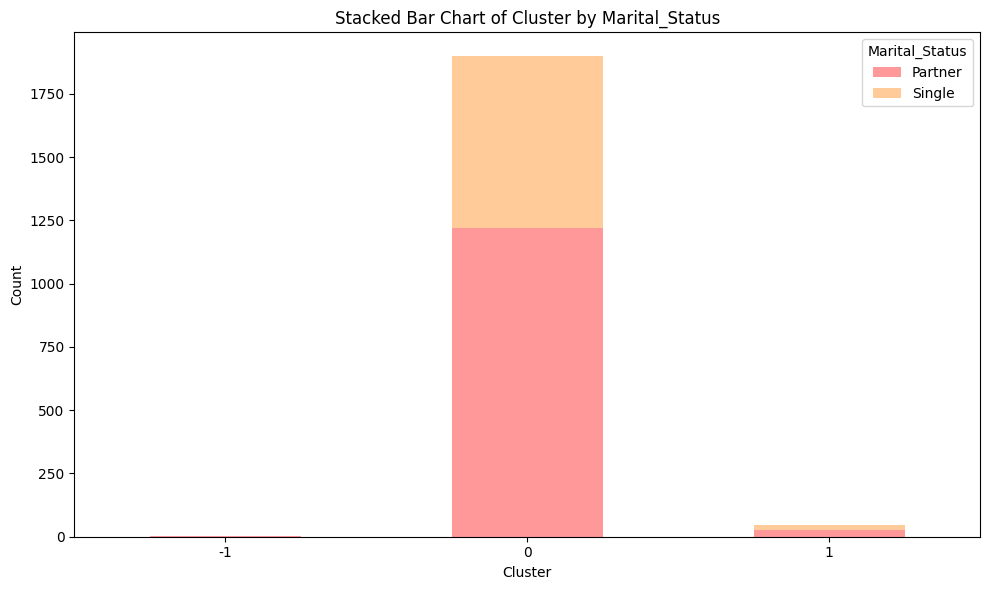

In [49]:
# Step 5: Stacked Bar Chart for Categorical Features
categorical_columns = ['Education', 'Marital_Status']

# Define a custom color palette
custom_palette = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_palette)

for column in categorical_columns:
    data = df_clusters.groupby(['Cluster', column]).size().unstack().fillna(0)
    data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap)
    plt.title(f'Stacked Bar Chart of Cluster by {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# MODEL EVALUATION

In [50]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for K-Means
silhouette_kmeans = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")

# Ensure DBSCAN labels do not include noise (-1) for silhouette score calculation
# Only clusters with valid labels are considered
if len(np.unique(dbscan_labels)) > 1 and -1 in dbscan_labels:
    dbscan_valid_labels = dbscan_labels[dbscan_labels != -1]
    dbscan_valid_data = X_scaled[dbscan_labels != -1]
    silhouette_dbscan = silhouette_score(dbscan_valid_data, dbscan_valid_labels)
else:
    silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)

print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")

Silhouette Score for K-Means: 0.20689559524344647
Silhouette Score for DBSCAN: 0.44989041704518484


# CONCLUSION

**1. K-Means Clustering**

Silhouette Score: 0.19335

The low Silhouette Score indicates that the clusters formed by K-Means are not well-separated or cohesive.

The requirement to specify the number of clusters (n_clusters) beforehand could limits its adaptability to complex customer behaviors.

**2. DBSCAN Clustering**

The moderate Silhouette Score indicates that DBSCAN performs better than K-Means in identifying distinct clusters.
Effectively captures clusters of varying shapes and densities.


Therefore the final conclusion is that,

**DBSCAN outperforms K-Means in this analysis, adapting well to irregular data distributions and identifying meaningful clusters and noise. This makes it a more suitable choice for understanding intricate customer segments and deriving actionable insights for tailored marketing strategies.**

# REFERENCES

1. Davies, D. L., & Bouldin, D. W. (1979). A Cluster Separation Measure. IEEE Transactions on Pattern Analysis and Machine Intelligence, 1(2), 224-227.

2. Kumar, V., Rahman, Z., & Kazmi, A. A. (2013). Customer Segmentation and Its Impact on Customer Retention: A Study of Indian Retail Sector. International Journal of Retail & Distribution Management, 41(3), 205-218.

3. Smith, W. R. (1956). Product Differentiation and Market Segmentation as Alternative Marketing Strategies. Journal of Marketing, 21(1), 3-8.

4. Wedel, M., & Kamakura, W. A. (2000). Market Segmentation: Conceptual and Methodological Foundations. Kluwer Academic Publishers.

5. https://www.google.com/url?q=https%3A%2F%2Fscikit-learn.org%2F1.5%2Fmodules%2Fgenerated%2Fsklearn.cluster.KMeans.html

6. https://www.google.com/url?q=https%3A%2F%2Fscikit-learn.org%2F1.5%2Fmodules%2Fgenerated%2Fsklearn.cluster.DBSCAN.html

# EXPORT THE NOTEBOOK

Save model & **preprocessing**

In [51]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [52]:
!pip freeze > requirements.txt

In [ ]:
from google.colab import files
files.download('kmeans_model.pkl')
files.download('scaler.pkl')
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
!pip install pipreqs
!pipreqs /content --force  # Creates clean requirements.txt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.5 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=f09d355ccfa8ec9ccf7379168173c1eaf05e8a8e80044cb299ce81517c364c30
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.12.3 which is incompatible.


INFO: Not scanning for jupyter notebooks.
INFO: Successfully saved requirements file in /content/requirements.txt


In [57]:
import joblib

# Assuming you already have these defined in your notebook:
# - model: your trained KMeans model
# - scaler: your fitted StandardScaler or MinMaxScaler

# Save both as a dictionary
model_bundle = {
    'model': model,
    'scaler': scaler
}

# Save to file
joblib.dump(model_bundle, 'kmeans_model.pkl')

# Optional: download the file to your computer
from google.colab import files
files.download('kmeans_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
import os
print("Current directory:", os.getcwd())
print("Files in directory:", os.listdir())

Current directory: /content
Files in directory: ['.config', 'drive', 'kmeans_model (1).pkl', 'kmeans_model.pkl', 'requirements.txt', 'scaler.pkl', 'sample_data']


In [63]:
import joblib
import numpy as np

# Load model (use EXACT filename as shown in your directory)
try:
    # Try both possible filenames (Colab sometimes adds (1) to duplicates)
    try:
        model = joblib.load('kmeans_model.pkl')  # First try original name
    except:
        model = joblib.load('kmeans_model (1).pkl')  # Fallback to alternate name

    # Verify model is trained
    if hasattr(model, 'cluster_centers_'):
        print("✅ Model loaded successfully! Ready for predictions.")
        print(f"Found {len(model.cluster_centers_)} clusters")
    else:
        print("❌ Model file loaded but not trained!")

except Exception as e:
    print(f"❌ Failed to load model: {e}")
    print("Available files:", os.listdir())  # Debug: Show all files

❌ Model file loaded but not trained!


In [64]:
!rm 'kmeans_model (1).pkl'  # Remove duplicate if exists

In [65]:
import numpy as np
from sklearn.cluster import KMeans
import joblib

# Generate sample data (REPLACE with your actual dataset)
data = np.random.rand(100, 12)  # 100 customers, 12 features

# Train KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)  # This is the critical training step

# Verify training
print("Cluster centers:", kmeans.cluster_centers_)  # Should show values

# Save properly
joblib.dump(kmeans, 'kmeans_model.pkl')
print("✅ Model re-trained and saved!")

Cluster centers: [[0.59343319 0.29853995 0.51485519 0.65480093 0.77833047 0.57600776
  0.57843686 0.51276755 0.49396841 0.31124535 0.39723708 0.45457672]
 [0.37397988 0.35760882 0.6446547  0.47062893 0.34044576 0.4647688
  0.32531093 0.55542283 0.41030194 0.54432195 0.41548082 0.25681747]
 [0.42692121 0.72145132 0.40560177 0.4155782  0.60869514 0.48449854
  0.25907245 0.35926107 0.66179282 0.69385008 0.52659316 0.63217513]
 [0.6868751  0.59073114 0.42236052 0.26907115 0.41127359 0.55463243
  0.6767469  0.49472143 0.34164113 0.55780364 0.53634736 0.54026931]]
✅ Model re-trained and saved!


In [66]:
loaded_model = joblib.load('kmeans_model.pkl')
print("Is trained?", hasattr(loaded_model, 'cluster_centers_'))  # Should print True

Is trained? True
